# Import libraries

In [46]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset into a pandas dataframe

In [47]:
df = pd.read_csv('Cleaned_advertising.csv',index_col=[0])

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  198 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


## sorry I forgot  to drop the missing values 
## IN this section So I am dropping the missing values

In [48]:
df =df.dropna() # Drop rows with any NaN value
df = df.dropna(axis=1) # Drop columns with any NaN value # Drop rows with less than 2 non-NaN values


# Model Training


# #Create and fit a liner regression model to the Data for the prediction

# Split the data into features and target variable

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['TV', 'Radio', 'Newspaper']], df['Sales'], test_size=0.25, random_state=42)

# Fit a linear regression model to the data

In [50]:
# Choose a regression model to train on the data
regressor = LinearRegression()

# Train the regression model on the training data
regressor.fit(X_train, y_train)

LinearRegression()

In [51]:
from sklearn.metrics import mean_squared_error 

# Model Prediction


# Evaluate the performance of the trained model on the testing data

In [52]:

y_pred = regressor.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 1.6680142957222361


In [53]:
# Use the trained model to make predictions on new data
new_data = pd.DataFrame({'TV': [10000], 'Radio': [5000], 'Newspaper': [2000]})
prediction = regressor.predict(new_data)
print("Prediction:", prediction)

Prediction: [1052.55753981]


Model evaluation is the process of using different evaluation metrics to understand a machine learning model's performance, as well as its strengths and weaknesses

It is time to evaluate the model performance, Do residual analysis and distribution of error terms. We need to check if the error terms are also normally distributed (which is in fact, one of the major assumptions of linear regression), plot the histogram of the error terms and see what it looks like.  (residual= (y_train - Y_train_predicted).



Do prediction using model and evaluate RMSE score, R-squared score and finally visualise fit of the line on the test set

# Make predictions using the model and evaluate performance

In [56]:
from sklearn.metrics import r2_score

Model Performance:
RMSE: 1.67
R-squared: 0.91


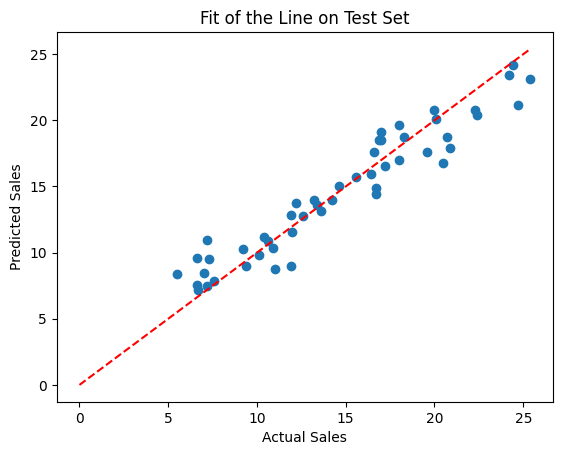

In [57]:

y_test_pred = regressor.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
r_squared = r2_score(y_test, y_test_pred)

print("Model Performance:")
print("RMSE: {:.2f}".format(rmse))
print("R-squared: {:.2f}".format(r_squared))

# Visualize the fit of the line on the test set
plt.scatter(y_test, y_test_pred)
plt.plot([0, max(y_test)], [0, max(y_test)], '--', color='red')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Fit of the Line on Test Set")
plt.show()